In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.4.0


In [2]:
# 와인 데이터셋 불러오기
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# 와인 데이터셋 합치기
red['type']=0 # 'type'열 만들고 모두 0으로 만들기 (feature_value, 입력 값) 
white['type']=1
wine=pd.concat([red,white])

In [3]:
# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [4]:
# 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <=5,'new_quality'] = 0 # (target_value)
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality']=2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [5]:
# 데이터 정규화 및 train,test 데이터 분리
del wine['quality']
wine_backup=wine.copy()
wine_norm = (wine-wine.min())/ (wine.max()-wine.min())
wine_norm['new_quality']=wine_backup['new_quality']
wine_shuffle=wine_norm.sample(frac=1)
wine_np=wine_shuffle.to_numpy()
print(wine_np.shape)

train_idx=int(len(wine_np)*0.8)
train_X,train_Y=wine_np[:train_idx,:-1],wine_np[:train_idx,-1]
test_X, test_Y=wine_np[train_idx:,:-1],wine_np[train_idx:,-1]
train_Y=tf.keras.utils.to_categorical(train_Y,num_classes=3) # 원핫코딩 
test_Y=tf.keras.utils.to_categorical(test_Y,num_classes=3)

print(train_Y)

(6497, 13)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
print(train_X.shape)
print(train_X[0])
print(train_Y[0])
print(wine_shuffle.keys())

(5197, 12)
[0.55371901 0.18666667 0.28313253 0.02453988 0.10797342 0.02777778
 0.03917051 0.17871602 0.39534884 0.30337079 0.57971014 0.        ]
[0. 1. 0.]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'new_quality'],
      dtype='object')


In [8]:
# 와인 데이터셋 다항 분류 모델 생성 및 학습
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=12,activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_X,train_Y,epochs=15, batch_size=32,validation_split=0.25)

Epoch 1/15
122/122 [==============================] - 2s 9ms/step - loss: 0.9916 - accuracy: 0.5121 - val_loss: 0.9066 - val_accuracy: 0.5569
Epoch 2/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8860 - accuracy: 0.5638 - val_loss: 0.9383 - val_accuracy: 0.5254
Epoch 3/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8645 - accuracy: 0.5711 - val_loss: 0.8734 - val_accuracy: 0.5546
Epoch 4/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.5747 - val_loss: 0.9121 - val_accuracy: 0.5477
Epoch 5/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.5766 - val_loss: 0.8624 - val_accuracy: 0.5762
Epoch 6/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.6018 - val_loss: 0.8660 - val_accuracy: 0.5823
Epoch 7/15
122/122 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.5793 - val_loss: 0.8540 - val_accuracy: 0.5792
Epoch 

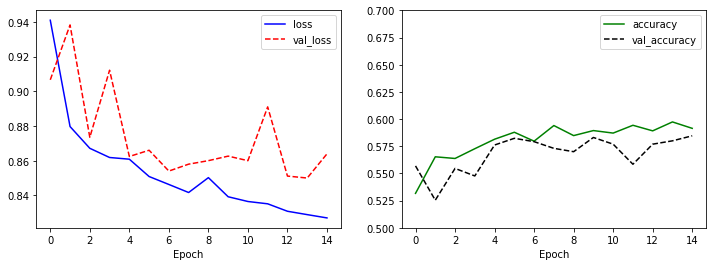

In [9]:
# 다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5,0.7)
plt.legend()
plt.show()

In [10]:
model.predict(test_X)

array([[0.82609457, 0.16774924, 0.00615617],
       [0.35124522, 0.51322764, 0.13552718],
       [0.02532906, 0.31588677, 0.65878415],
       ...,
       [0.08881333, 0.47539094, 0.43579572],
       [0.1174392 , 0.5065139 , 0.37604693],
       [0.02701001, 0.30577278, 0.6672172 ]], dtype=float32)

In [24]:
# 다항 분류 모델 평가
model.evaluate(test_X,test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.8248 - accuracy: 0.5892


[0.8248028755187988, 0.5892307758331299]

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}